# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Data/SeoulBikeData.csv', encoding= 'unicode_escape')

In [4]:
dataset.head(30)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
dataset.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [7]:
dataset['Hour'].value_counts()

0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64

In [8]:
dataset_0 = dataset[dataset['Hour']==0]

In [9]:
dataset_0

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
24,02/12/2017,328,0,-1.8,87,1.1,994,-3.6,0.0,0.0,0.0,Winter,No Holiday,Yes
48,03/12/2017,342,0,4.0,58,1.4,1296,-3.5,0.0,0.0,0.0,Winter,No Holiday,Yes
72,04/12/2017,285,0,4.2,88,0.6,216,2.3,0.0,0.0,0.0,Winter,No Holiday,Yes
96,05/12/2017,216,0,-6.1,42,2.6,2000,-16.9,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,26/11/2018,387,0,3.3,85,1.1,351,1.0,0.0,0.0,0.3,Autumn,No Holiday,Yes
8664,27/11/2018,496,0,4.9,79,0.5,391,1.5,0.0,0.0,0.0,Autumn,No Holiday,Yes
8688,28/11/2018,450,0,5.1,36,2.2,774,-8.7,0.0,0.0,0.0,Autumn,No Holiday,Yes
8712,29/11/2018,517,0,2.2,30,0.7,1879,-13.6,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [10]:
dataset_0.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,365.000000,365.0,365.000000,365.000000,365.000000,365.000000,365.000000,365.0,365.000000,365.000000
mean,541.460274,0.0,11.286301,64.997260,1.453699,1433.380822,4.543014,0.0,0.145205,0.061644
std,364.573274,0.0,11.368432,16.886255,0.842203,623.765000,12.790374,0.0,1.126070,0.346343
min,0.000000,0.0,-15.900000,22.000000,0.000000,54.000000,-27.400000,0.0,0.000000,0.000000
25%,196.000000,0.0,2.600000,53.000000,0.800000,925.000000,-4.000000,0.0,0.000000,0.000000
50%,513.000000,0.0,11.900000,64.000000,1.400000,1717.000000,5.700000,0.0,0.000000,0.000000
75%,862.000000,0.0,20.700000,79.000000,1.900000,2000.000000,15.000000,0.0,0.000000,0.000000
max,1394.000000,0.0,32.100000,98.000000,4.600000,2000.000000,25.600000,0.0,18.000000,3.500000


#EDA

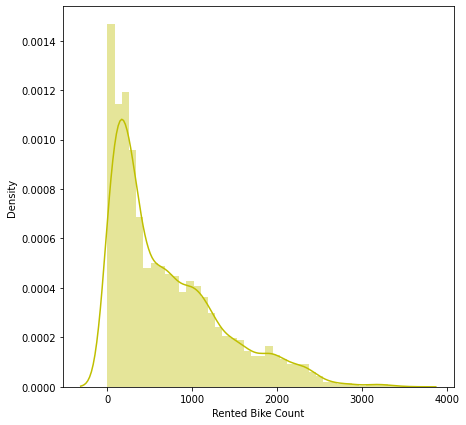

In [11]:
# dependent variable Rented Bike Count
plt.figure(figsize=(7,7))
sns.distplot(dataset['Rented Bike Count'], color ='y')


In [12]:
# Numerical features

numerical_features = dataset.describe().columns

In [13]:
numerical_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

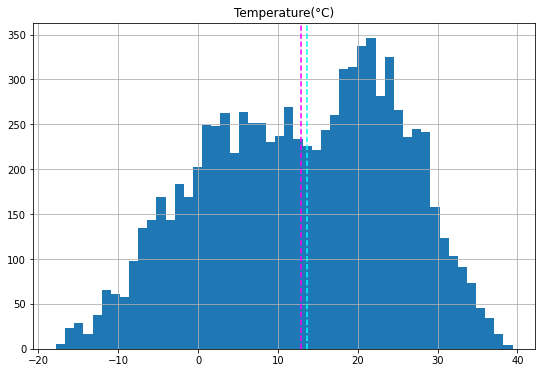

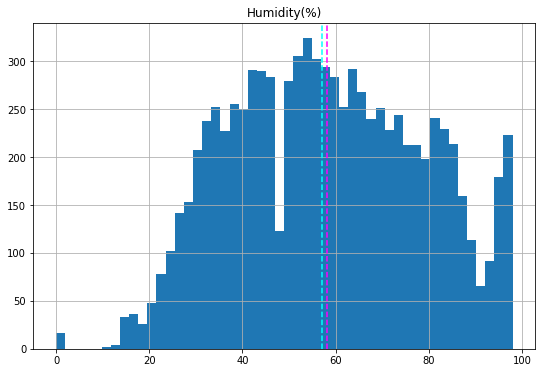

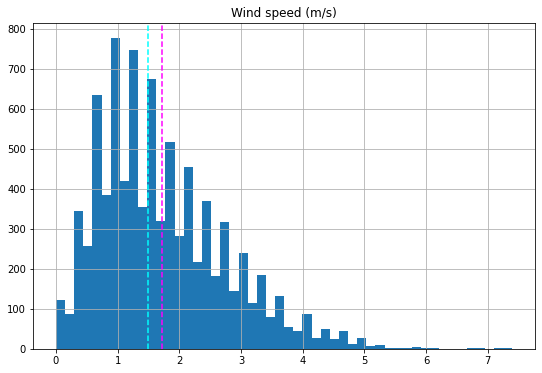

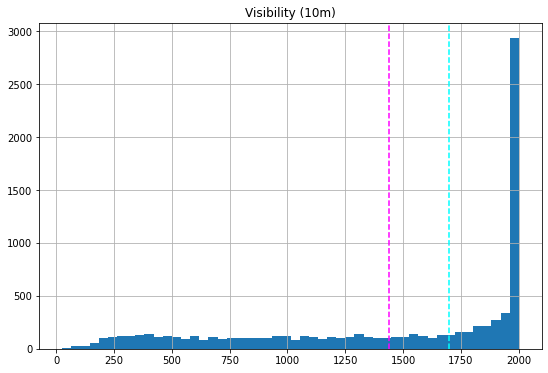

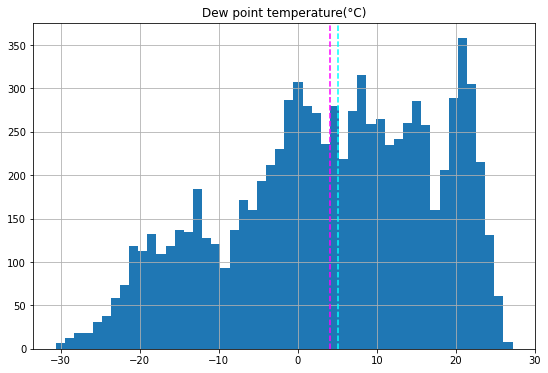

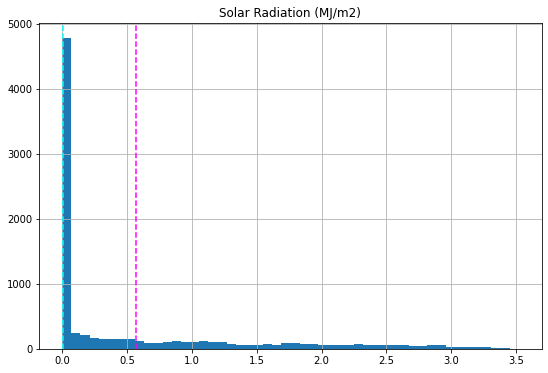

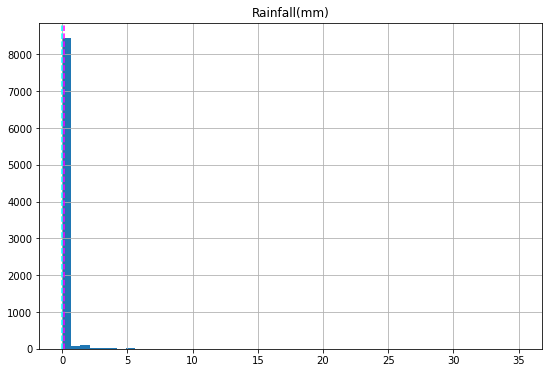

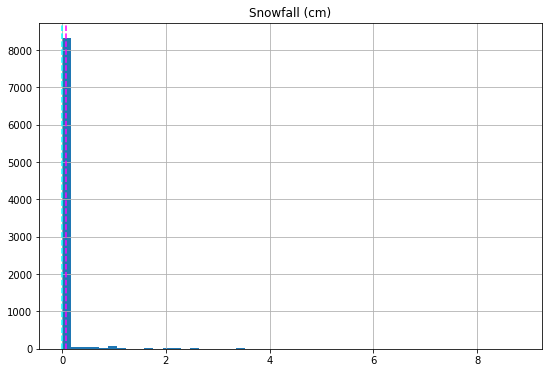

In [14]:
# Let's see among the numerical features(independent features) one that following normal disribution
# features plot shows the yearly distribution(from dec 2017 to nov 2018) at zero hour. 
for fea in numerical_features[2:]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = dataset[fea]
  feature.hist(bins = 50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='--')
  ax.axvline(feature.median(), color='cyan', linestyle='--')
  ax.set_title(fea)
plt.show()


In [15]:
dataset_0['Visibility (10m)'].value_counts()

2000    112
1995      3
1741      3
1990      3
1465      2
       ... 
171       1
185       1
426       1
346       1
1411      1
Name: Visibility (10m), Length: 228, dtype: int64

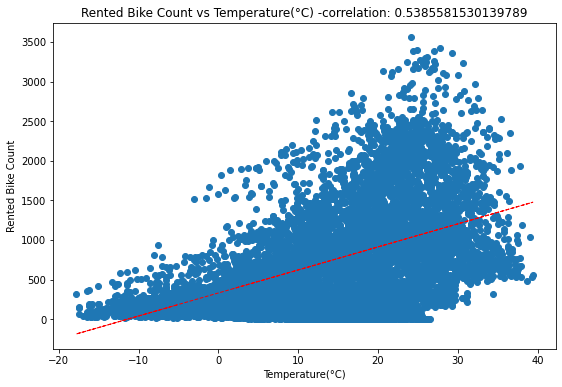

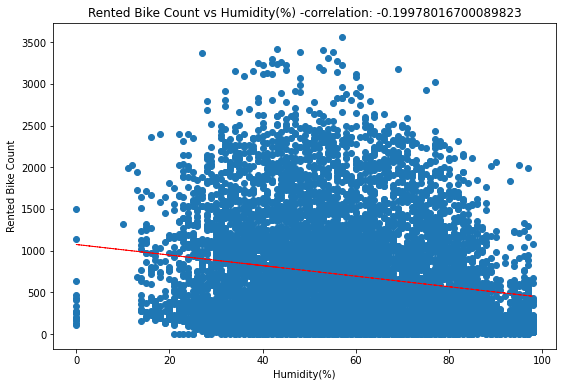

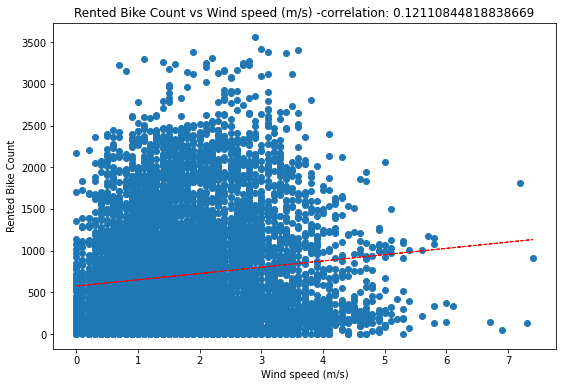

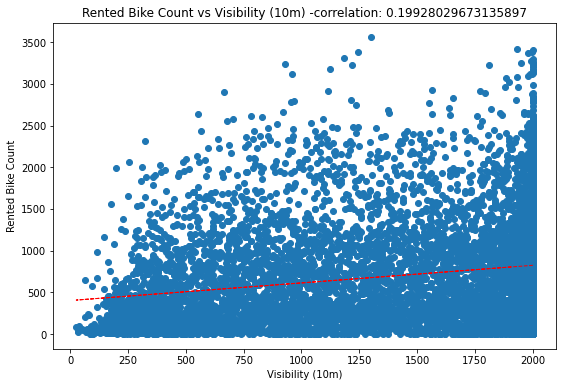

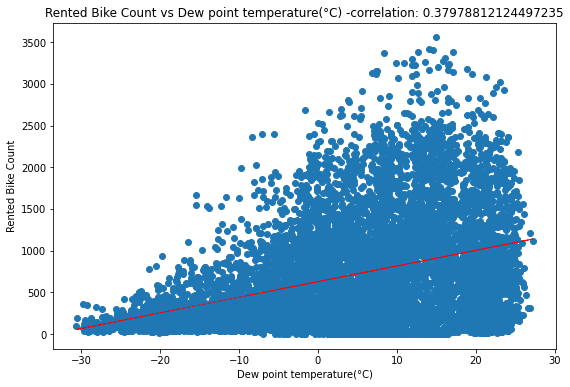

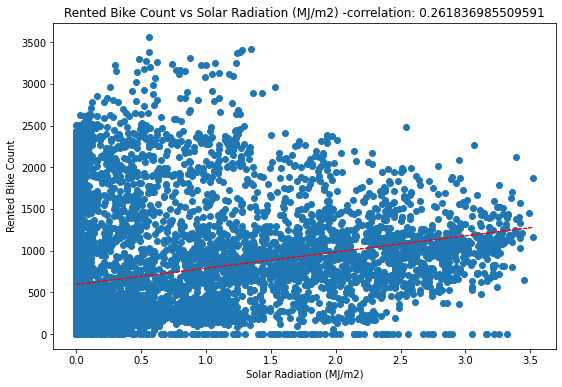

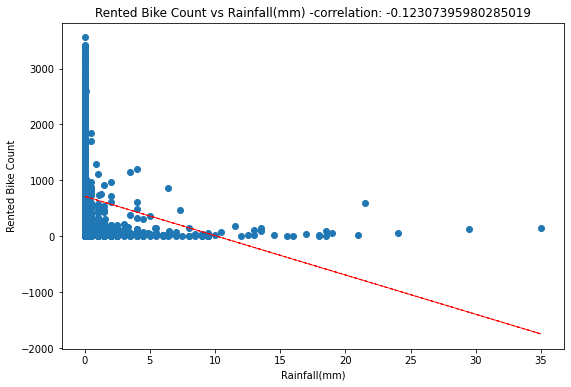

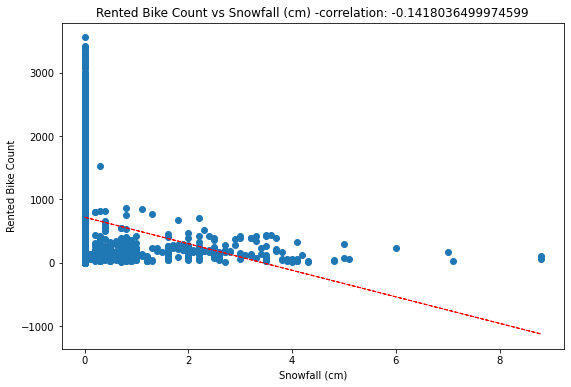

In [16]:
corr_dict = {}
for fea in numerical_features[2:]:
  
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = dataset[fea]
  label = dataset['Rented Bike Count']
  correlation = feature.corr(label)
  corr_dict[fea] = correlation
  plt.scatter(x=feature, y= label)
  plt.xlabel(fea)
  plt.ylabel('Rented Bike Count')
  ax.set_title('Rented Bike Count vs '+fea+' -correlation: '+str(correlation))
  z = np.polyfit(dataset[fea], dataset['Rented Bike Count'], 1)
  y_hat = np.poly1d(z)(dataset[fea])

  plt.plot(dataset[fea], y_hat, 'r--', lw=1)
plt.show()

In [17]:
corr_dict

{'Dew point temperature(°C)': 0.37978812124497235,
 'Humidity(%)': -0.19978016700089823,
 'Rainfall(mm)': -0.12307395980285019,
 'Snowfall (cm)': -0.1418036499974599,
 'Solar Radiation (MJ/m2)': 0.261836985509591,
 'Temperature(°C)': 0.5385581530139789,
 'Visibility (10m)': 0.19928029673135897,
 'Wind speed (m/s)': 0.12110844818838669}

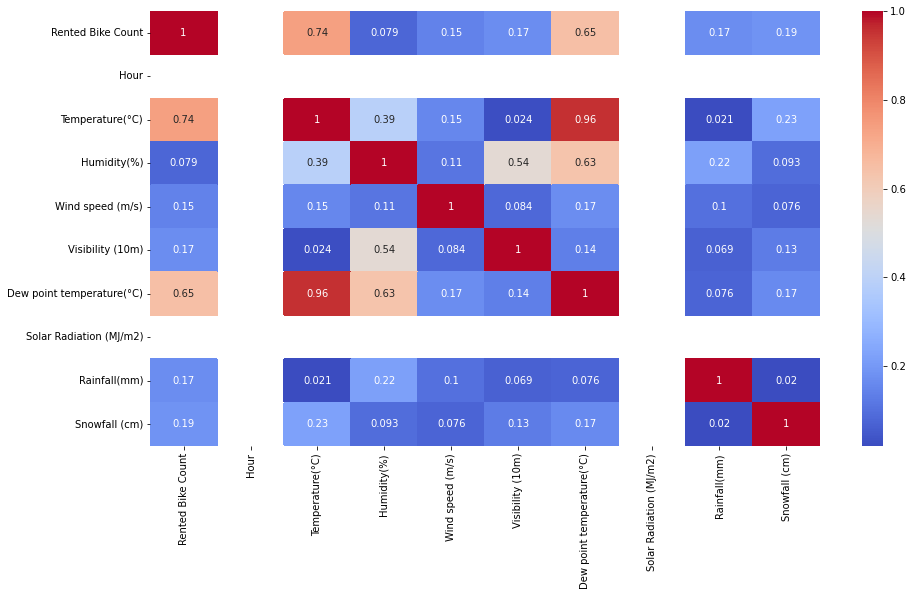

In [18]:
# Heatmap

plt.figure(figsize =(15,8))
correlation = dataset_0.corr()
sns.heatmap(abs(correlation), annot=True, cmap ='coolwarm')

In [19]:
numerical_features = numerical_features.tolist()


In [20]:
numerical_features.remove('Solar Radiation (MJ/m2)')

In [21]:
numerical_features.remove('Hour')

In [22]:
print(numerical_features)

['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Rainfall(mm)', 'Snowfall (cm)']


In [23]:
# In heatmap, temperature and dew point temperature are highly correlated.
# dew point temp is less related with rented bike count compare to temperature
# dew point temp is related with humidity also
numerical_features.remove('Dew point temperature(°C)')

In [24]:
# Humidity is related with visibility not very strongly
dataset_0['hum_vis'] =  0.6*dataset_0['Visibility (10m)'] + 0.4*dataset_0['Humidity(%)']

In [25]:
dataset_pr = dataset_0.copy()

In [26]:
# Multicollinearity using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  # Calculating VIF
  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

In [27]:
dataset_0.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'hum_vis'],
      dtype='object')

In [28]:
calc_vif(dataset_0[[i for i in dataset_0.describe().columns if i not in ['Dew point temperature(°C)', 'Visibility (10m)', 'Humidity(%)', 'Solar Radiation (MJ/m2)', 'Hour', 'Rented Bike Count']]])

,variables,VIF
0,Temperature(°C),1.818884
1,Wind speed (m/s),3.145494
2,Rainfall(mm),1.035374
3,Snowfall (cm),1.068794
4,hum_vis,3.669052


Variables' VIF values are under 5. Means they are non corelated.

In [29]:
# Categorical features

categorical_features = dataset_0.describe(include=['object', 'category']).columns

In [30]:
categorical_features.tolist()

['Date', 'Seasons', 'Holiday', 'Functioning Day']

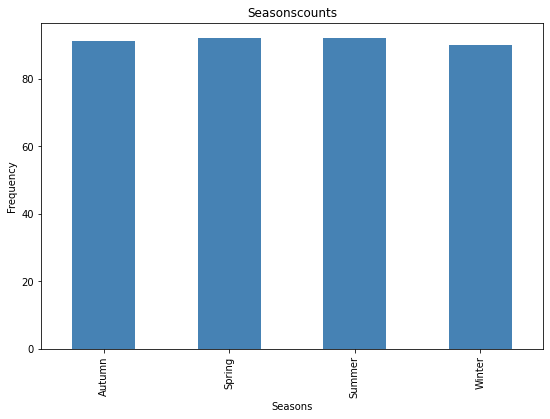

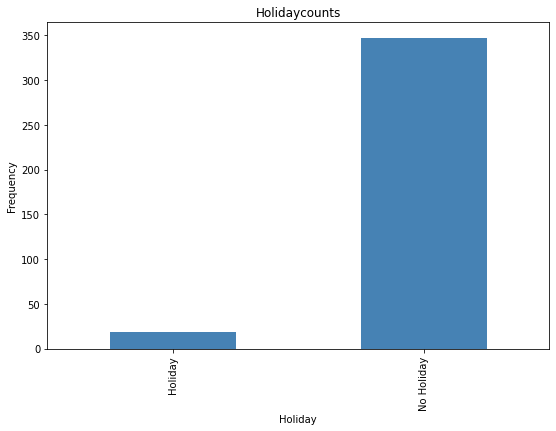

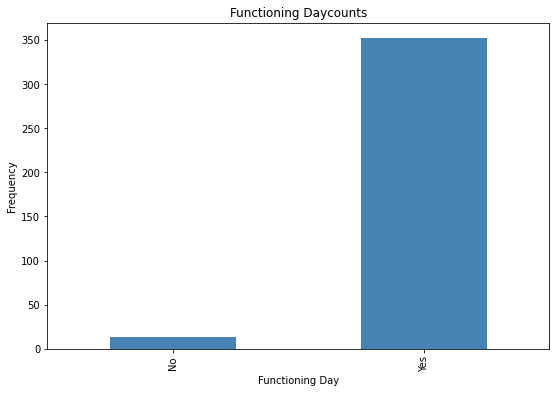

In [31]:
for col in categorical_features[1:]:
  counts = dataset_0[col].value_counts().sort_index()
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  counts.plot.bar(ax=ax, color='steelblue')
  ax.set_title(col+'counts')
  ax.set_xlabel(col)
  ax.set_ylabel('Frequency')
plt.show()


In [32]:
dataset_0['Holiday'].value_counts()

No Holiday    347
Holiday        18
Name: Holiday, dtype: int64

In [33]:
dataset_0[dataset_0['Holiday']=='Holiday']['Functioning Day'].value_counts()

Yes    17
No      1
Name: Functioning Day, dtype: int64

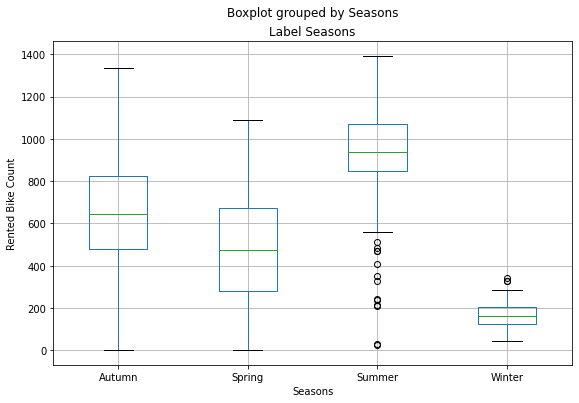

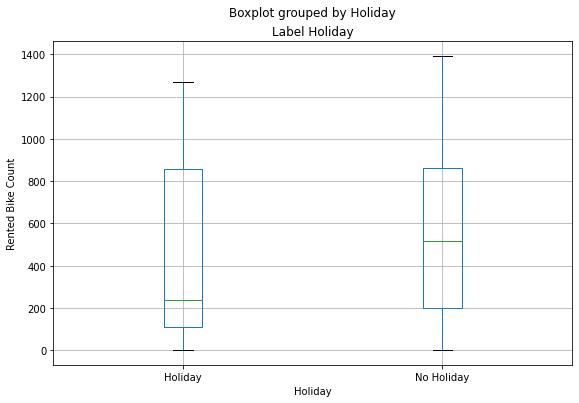

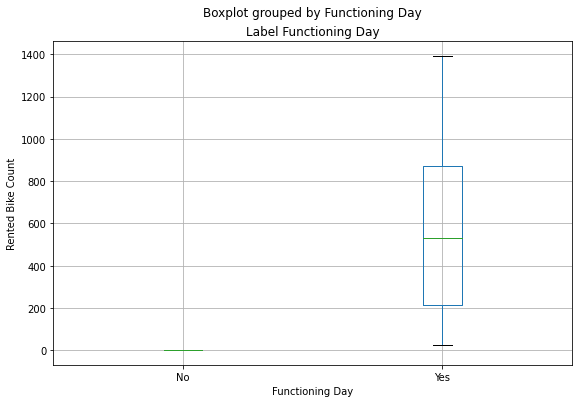

In [34]:
for col in categorical_features[1:]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  dataset_0.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
  ax.set_title('Label '+col)
  ax.set_ylabel('Rented Bike Count')
plt.show()

In [35]:
## Data encoding

encoders_num = {'Holiday':{'Holiday':1, 'No Holiday':0},
                'Functioning Day':{'No':1, 'Yes':1}}

In [36]:
dataset_0 = dataset_0.replace(encoders_num)

In [37]:
dataset_0.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,hum_vis
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,1214.8
24,02/12/2017,328,0,-1.8,87,1.1,994,-3.6,0.0,0.0,0.0,Winter,0,1,631.2
48,03/12/2017,342,0,4.0,58,1.4,1296,-3.5,0.0,0.0,0.0,Winter,0,1,800.8
72,04/12/2017,285,0,4.2,88,0.6,216,2.3,0.0,0.0,0.0,Winter,0,1,164.8
96,05/12/2017,216,0,-6.1,42,2.6,2000,-16.9,0.0,0.0,0.0,Winter,0,1,1216.8


In [38]:
# One hot encoding

dataset_0 = pd.get_dummies(dataset_0, columns = ['Seasons'], prefix = ['seas'])

In [39]:
dataset_0.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,hum_vis,seas_Autumn,seas_Spring,seas_Summer,seas_Winter
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,1214.8,0,0,0,1
24,02/12/2017,328,0,-1.8,87,1.1,994,-3.6,0.0,0.0,0.0,0,1,631.2,0,0,0,1
48,03/12/2017,342,0,4.0,58,1.4,1296,-3.5,0.0,0.0,0.0,0,1,800.8,0,0,0,1
72,04/12/2017,285,0,4.2,88,0.6,216,2.3,0.0,0.0,0.0,0,1,164.8,0,0,0,1
96,05/12/2017,216,0,-6.1,42,2.6,2000,-16.9,0.0,0.0,0.0,0,1,1216.8,0,0,0,1


In [40]:
dataset_0['Functioning Day'].value_counts()
#all values are 1. Hence variance is zero.
# we will not consider this column

1    365
Name: Functioning Day, dtype: int64

In [41]:
Features = ['Temperature(°C)', 'Wind speed (m/s)', 'Rainfall(mm)', 'Snowfall (cm)', 'hum_vis', 'Holiday','seas_Autumn', 'seas_Spring', 'seas_Summer', 'seas_Winter']

In [42]:
len(Features)

10

In [57]:
X = dataset_0[Features].apply(zscore)

In [58]:
X

,Temperature(°C),Wind speed (m/s),Rainfall(mm),Snowfall (cm),hum_vis,Holiday,seas_Autumn,seas_Spring,seas_Summer,seas_Winter
0,-1.452173,0.887346,-0.129126,-0.178229,0.888141,-0.227757,-0.576296,-0.580514,-0.580514,1.748015
24,-1.152689,-0.420545,-0.129126,-0.178229,-0.688386,-0.227757,-0.576296,-0.580514,-0.580514,1.748015
48,-0.641804,-0.063847,-0.129126,-0.178229,-0.230232,-0.227757,-0.576296,-0.580514,-0.580514,1.748015
72,-0.624187,-1.015041,-0.129126,-0.178229,-1.948311,-0.227757,-0.576296,-0.580514,-0.580514,1.748015
96,-1.531448,1.362943,-0.129126,-0.178229,0.893544,-0.227757,-0.576296,-0.580514,-0.580514,1.748015
...,...,...,...,...,...,...,...,...,...,...
8640,-0.703462,-0.420545,-0.129126,0.689154,-1.732741,-0.227757,1.735220,-0.580514,-0.580514,-0.572078
8664,-0.562529,-1.133940,-0.129126,-0.178229,-1.674391,-0.227757,1.735220,-0.580514,-0.580514,-0.572078
8688,-0.544912,0.887346,-0.129126,-0.178229,-1.100077,-0.227757,1.735220,-0.580514,-0.580514,-0.572078
8712,-0.800354,-0.896141,-0.129126,-0.178229,0.684456,-0.227757,1.735220,-0.580514,-0.580514,-0.572078


In [61]:
# rented bike count isa right skewed
y = dataset_0['Rented Bike Count']

In [62]:
type(y)

pandas.core.series.Series

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(292, 10)
(73, 10)


In [64]:
np.all(np.isfinite(y))


True

In [65]:
np.any(np.isnan(y))

False

In [66]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression().fit(X_train, y_train)

In [67]:
reg.score(X_train, y_train)

0.6170148860930034

In [68]:
reg.coef_

array([158.38733704, -12.03060476, -52.23118001,  -7.72938912,
        29.88081958,   6.30261274,  24.02845924, -25.79292392,
        76.97090133, -75.67260733])

In [69]:
len(reg.coef_)

10

In [70]:
reg.intercept_

548.5938125231073

In [71]:
y_pred = reg.predict(X_test)

In [72]:
y_pred

array([ 414.5713859 ,  930.03795582,  248.68060023,  127.63511868,
        200.34323439,  565.19519455,  327.77491829,  660.81362127,
        958.67043871,  178.12276438,  463.02407218,  550.49026116,
        962.1045386 ,  783.84587367,  716.5978887 ,  822.81652527,
        735.39461492,  372.37423373,  560.95382623,  504.86534946,
        602.7112982 ,  850.26945185,  128.65563029,  777.23817607,
        718.7506816 , 1011.31084087,   84.95823938,  551.13607206,
        366.29433048,  883.45795411,  471.93979304,  393.20887342,
        126.82670567,  186.01526055,  -10.36597193,  143.83580017,
        113.97517843,  483.15775873,  961.26444822,  173.29980257,
        872.1853841 ,  750.83051887,  900.35914862,  947.15878292,
         90.80122621,  656.54971019,  734.02626678,  869.74985471,
       1003.9068472 ,   90.28338746,  322.85838752,  936.2409807 ,
       1021.59116981,  466.78221823,  381.26432327,  -22.31212308,
        260.58207212,  457.33580265,  258.09508602,  224.84252

In [73]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)

In [74]:
MSE


47332.857183299624

In [75]:
np.sqrt(MSE)

217.56115734041228

In [76]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2: ', r2)


R2:  0.6227463576923025


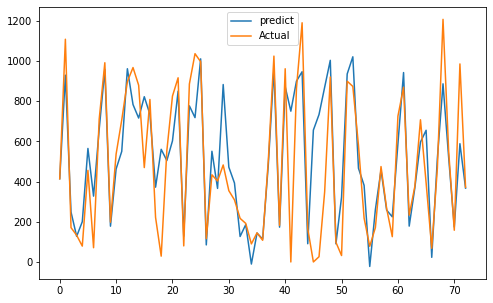

In [77]:
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(['predict', 'Actual'])
plt.show()